In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn



Sample S1
  Iteration 0: Accuracy = 0.8060
  Iteration 5: Accuracy = 0.6933
  Iteration 10: Accuracy = 0.6933
  Iteration 15: Accuracy = 0.7880

Sample S2
  Iteration 0: Accuracy = 0.8687
  Iteration 5: Accuracy = 0.8047
  Iteration 10: Accuracy = 0.8047
  Iteration 15: Accuracy = 0.8247

Sample S3
  Iteration 0: Accuracy = 0.9340
  Iteration 5: Accuracy = 0.8180
  Iteration 10: Accuracy = 0.8820
  Iteration 15: Accuracy = 0.6973

Sample S4
  Iteration 0: Accuracy = 0.8147
  Iteration 5: Accuracy = 0.8613
  Iteration 10: Accuracy = 0.6953
  Iteration 15: Accuracy = 0.8613

Sample S5
  Iteration 0: Accuracy = 0.7193
  Iteration 5: Accuracy = 0.8833
  Iteration 10: Accuracy = 0.8833
  Iteration 15: Accuracy = 0.8353

Sample S6
  Iteration 0: Accuracy = 0.9240
  Iteration 5: Accuracy = 0.6993
  Iteration 10: Accuracy = 0.6993
  Iteration 15: Accuracy = 0.6993

Sample S7
  Iteration 0: Accuracy = 0.7200
  Iteration 5: Accuracy = 0.8307
  Iteration 10: Accuracy = 0.8820
  Iteration 15: Acc

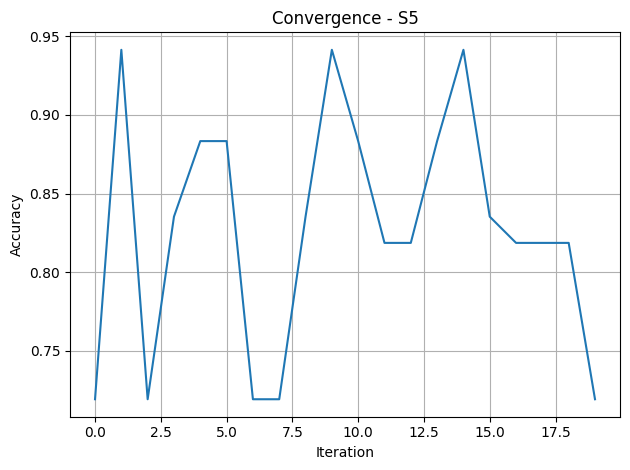

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import random

# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar',
           'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv(url, header=None, names=columns)

# Optional: Use smaller subset to speed things up
df = df.sample(5000, random_state=42)

# Encode labels
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

# Scale features
X = df.drop('letter', axis=1)
y = df['letter']
X_scaled = StandardScaler().fit_transform(X)

# SVM parameter space
kernels = ['linear', 'rbf']
C_range = [0.1, 1, 10]

results = []

# Optimization for 10 Samples
for i in range(10):
    print(f"\nSample S{i+1}")
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)

    best_acc = 0
    best_params = None
    acc_list = []

    for iteration in range(20):  # reduced from 100 to 20
        kernel = random.choice(kernels)
        C = random.choice(C_range)

        model = svm.SVC(kernel=kernel, C=C, cache_size=500)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        acc_list.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_params = (kernel, C)

        if iteration % 5 == 0:
            print(f"  Iteration {iteration}: Accuracy = {acc:.4f}")

    results.append({
        "Sample": f"S{i+1}",
        "Best Accuracy": best_acc,
        "Kernel": best_params[0],
        "C": best_params[1],
        "Acc List": acc_list
    })

# Results table
results_df = pd.DataFrame(results)[["Sample", "Best Accuracy", "Kernel", "C"]]
print("\nFinal Results:\n", results_df)

# Save to CSV
results_df.to_csv("svm_results_fast.csv", index=False)

# Plot convergence of best
best_sample = max(results, key=lambda x: x["Best Accuracy"])
plt.plot(best_sample['Acc List'])
plt.title(f"Convergence - {best_sample['Sample']}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.tight_layout()
plt.savefig("convergence_best_sample.png")
plt.show()


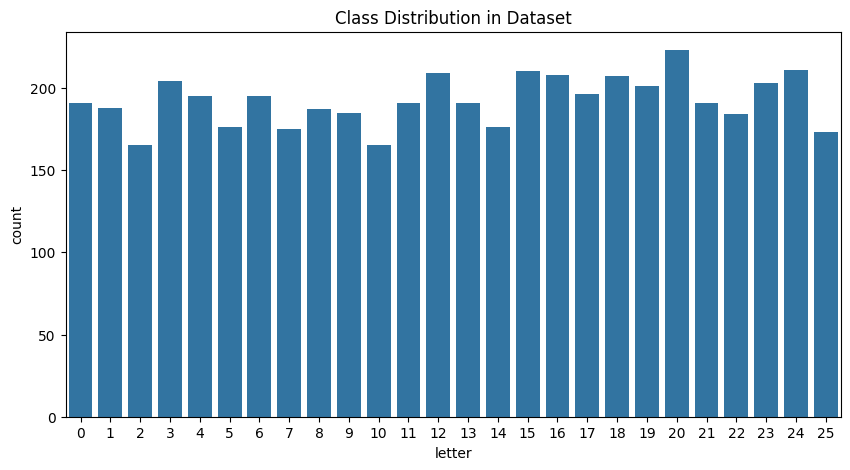


Data Summary:
            letter       x-box        y-box        width         high  \
count  5000.000000  5000.00000  5000.000000  5000.000000  5000.000000   
mean     12.696800     4.01340     6.986000     5.119200     5.338600   
std       7.477329     1.91707     3.299149     2.009826     2.235207   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%       6.000000     3.00000     5.000000     4.000000     4.000000   
50%      13.000000     4.00000     7.000000     5.000000     6.000000   
75%      19.000000     5.00000     9.000000     6.000000     7.000000   
max      25.000000    13.00000    15.000000    13.000000    15.000000   

             onpix        x-bar        y-bar        x2bar        y2bar  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      3.494600     6.894400     7.505000     4.584400     5.188400   
std       2.185527     2.029895     2.323759     2.665839     2.344612   
min       0.000000     0.000000

In [4]:
# Data analytics
plt.figure(figsize=(10, 5))
sns.countplot(x='letter', data=df)
plt.title("Class Distribution in Dataset")
plt.savefig("class_distribution.png")
plt.show()

print("\nData Summary:")
print(df.describe())
